## Implementing PCA

### Principal components

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

#pd.set_option('max_rows',500)
#pd.set_option('max_columns',1000)
#pd.set_printoptions(suppress=True)

In [6]:
# import Data
df=pd.read_csv('mnist_012.csv')

#prepare X and Y
Y=df.loc[:,'0']
X=df.drop(['0'],axis=1)
# PCA works only on predictor variables
print(df.shape)
df.head()

(3147, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### This dataset has 784 columns as explanatory variables and one Y variable names '0'which tells what digit the row represents.
* we won't use the Y when creating the principal components. Because i don't want the PCA algorithm to know
  which class (digit) a perticulat row belongs to.

In [9]:
# PCA
pca=PCA(n_components=100)
df_pca=pca.fit_transform(X=X)
type(df_pca)
# why transform?- in PCA we take the original dataset, we chang the values 
# to Z, we convert it to varience and then we find totally different dataset
# out of it. so we ask the machine to work on the exact datset do mathematical
# calculations on the dataset and change it completely. That is where transforms comes.

numpy.ndarray

In [11]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-134.272411,107.740102,-544.923409,313.075995,-500.134984,163.354257,-223.046202,-460.862230,1016.398101,206.766569,...,77.659657,-98.162141,29.534574,67.833043,16.993318,49.225684,-5.650937,-34.400240,-20.133818,-67.020418
1,-970.415120,-371.815822,114.480754,-339.005161,-53.982528,-106.119976,19.826571,-443.883821,-220.422308,69.631541,...,29.962343,-13.297178,-96.039403,32.458107,-19.131847,-59.342853,-31.089023,-36.098919,-37.076538,-5.361855
2,1267.529703,-263.230207,-35.686933,612.758735,-734.466510,267.736219,363.049398,-130.846205,-160.311189,-353.753832,...,12.272739,-62.025311,-82.644940,-26.760444,25.844742,-47.025483,-24.410244,89.977321,-17.554734,-1.391901
3,-1066.123553,-239.331642,137.988622,-424.366232,-174.547095,209.850342,57.164605,-316.860862,-325.027744,148.858641,...,-19.302016,25.504385,35.494477,-16.658508,7.506953,24.674662,23.419644,30.664179,-26.903091,6.483807
4,1037.176916,-427.394186,-700.740250,-566.284242,134.667726,-584.412756,-546.833432,-70.674785,52.580773,306.396590,...,-52.824810,2.348814,-36.579718,6.410873,-31.253643,-41.191791,0.730408,50.916139,30.658129,-24.685484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,-1018.214154,-466.254488,28.869654,230.822878,-86.809623,381.402310,-161.224381,-116.844290,-362.088183,197.669072,...,-43.613993,86.245739,59.513825,4.172335,19.191170,11.407579,2.784999,58.766357,43.974710,-75.313999
3143,-31.910688,532.992544,-725.466820,99.339389,-203.097496,275.152761,-263.029637,381.752773,-995.475814,-504.893245,...,60.938708,-166.237139,1.936329,-29.600739,-41.420944,-61.287185,23.693954,-43.372366,14.882466,44.054803
3144,1467.868047,-268.859552,635.240891,-466.368315,-162.052084,1172.372583,-91.875584,437.256586,644.772398,164.700653,...,163.682426,21.154822,65.874384,-99.314684,-162.735321,-9.280921,-3.168957,-37.310564,-14.692707,-25.650358
3145,-1070.029279,-119.693078,180.788257,-271.003026,-213.400907,409.351276,-138.321389,-249.781267,-284.347898,214.286986,...,12.720000,-11.242754,-31.088513,-103.681496,-15.417017,37.543461,21.744519,0.842536,32.547771,-16.555355


In [10]:
# store as dataframe and print
df_pca=pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.round(2).head()

(3147, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,...,77.66,-98.16,29.53,67.83,16.99,49.23,-5.65,-34.40,-20.13,-67.02
1,-970.42,-371.82,114.48,-339.01,-53.98,-106.12,19.83,-443.88,-220.42,69.63,...,29.96,-13.30,-96.04,32.46,-19.13,-59.34,-31.09,-36.10,-37.08,-5.36
2,1267.53,-263.23,-35.69,612.76,-734.47,267.74,363.05,-130.85,-160.31,-353.75,...,12.27,-62.03,-82.64,-26.76,25.84,-47.03,-24.41,89.98,-17.55,-1.39
3,-1066.12,-239.33,137.99,-424.37,-174.55,209.85,57.16,-316.86,-325.03,148.86,...,-19.30,25.50,35.49,-16.66,7.51,24.67,23.42,30.66,-26.90,6.48
4,1037.18,-427.39,-700.74,-566.28,134.67,-584.41,-546.83,-70.67,52.58,306.40,...,-52.82,2.35,-36.58,6.41,-31.25,-41.19,0.73,50.92,30.66,-24.69


#### The first column is the first PC and so on. This dataframe(df_pca) has the same rows as the data X.

##### Percentage of variance Explained with each PC
* The PCs are usually arrange in descending order of the variance(information) explained. To see how much of the
   total information is control by each PC, look at the explained_variance_ratio_attribute.
    
* How to read this?
  * PC1 contributes 22%, PC2 contributes 10% and so on.
  * The further you go, lesser is the contribution to the total variance. Plotting a cumulative sum gives a bigger
    picture.

In [12]:
# variance associated to each PC is obtained
v=pca.explained_variance_
v

array([764074.70509694, 333409.88084323, 206248.30545139, 190073.11430869,
       149373.67054257, 140893.79592355, 103478.87643359,  87549.48702637,
        82347.51266608,  66776.33611636,  56734.88041817,  50888.10842031,
        48723.43475235,  44766.34864872,  42979.74063701,  39220.43916146,
        34644.2720123 ,  33867.28940232,  31499.70087344,  29871.85610517,
        27799.1031353 ,  27094.4078461 ,  25070.70731204,  24148.77039628,
        22922.38295247,  22438.22953743,  21647.88928735,  19562.7120036 ,
        17864.20456992,  17535.62961723,  16732.17825654,  15998.44816379,
        15709.97739716,  14589.53343938,  14294.23646003,  13738.41108481,
        12966.46364438,  12211.69288959,  11518.94361383,  11300.481883  ,
        10640.4465692 ,  10370.37551656,  10198.67419955,   9919.58152765,
         9815.13683651,   9249.09097654,   9174.50343027,   8865.24340311,
         8529.54206778,   8433.71186094,   8091.2902836 ,   7625.30211278,
         7513.02769475,  

In [13]:
# This returns the ratio of variance to total variance of the data for each PC
print(pca.explained_variance_ratio_.round(4))

[0.2226 0.0971 0.0601 0.0554 0.0435 0.041  0.0301 0.0255 0.024  0.0195
 0.0165 0.0148 0.0142 0.013  0.0125 0.0114 0.0101 0.0099 0.0092 0.0087
 0.0081 0.0079 0.0073 0.007  0.0067 0.0065 0.0063 0.0057 0.0052 0.0051
 0.0049 0.0047 0.0046 0.0043 0.0042 0.004  0.0038 0.0036 0.0034 0.0033
 0.0031 0.003  0.003  0.0029 0.0029 0.0027 0.0027 0.0026 0.0025 0.0025
 0.0024 0.0022 0.0022 0.0021 0.0021 0.002  0.002  0.0019 0.0018 0.0018
 0.0017 0.0017 0.0016 0.0016 0.0016 0.0015 0.0015 0.0014 0.0014 0.0013
 0.0013 0.0013 0.0013 0.0012 0.0012 0.0012 0.0011 0.0011 0.0011 0.0011
 0.0011 0.001  0.001  0.001  0.001  0.001  0.0009 0.0009 0.0009 0.0009
 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0007 0.0007 0.0007 0.0007]


In [14]:
pca.explained_variance_ratio_.round(4).size

100

In [15]:
# Getting a batter picture of commulative variance explained by the 25 PCs
variances=pca.explained_variance_ratio_.round(4).reshape(1,-1)
percentage=(variances*100).reshape(1,-1)
var=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)
r=np.arange(1,101)
final=[r,variances[0], percentage[0], var[0]]
final
df=pd.DataFrame(data=final)
df1=df.T
columns=['PC#','Variance','Percentage','Cummulative var']
df1.columns=columns
df1

,PC#,Variance,Percentage,Cummulative var
0,1.0,0.2226,22.26,22.26
1,2.0,0.0971,9.71,31.97
2,3.0,0.0601,6.01,37.98
3,4.0,0.0554,5.54,43.52
4,5.0,0.0435,4.35,47.87
...,...,...,...,...
95,96.0,0.0008,0.08,93.58
96,97.0,0.0007,0.07,93.65
97,98.0,0.0007,0.07,93.72
98,99.0,0.0007,0.07,93.79


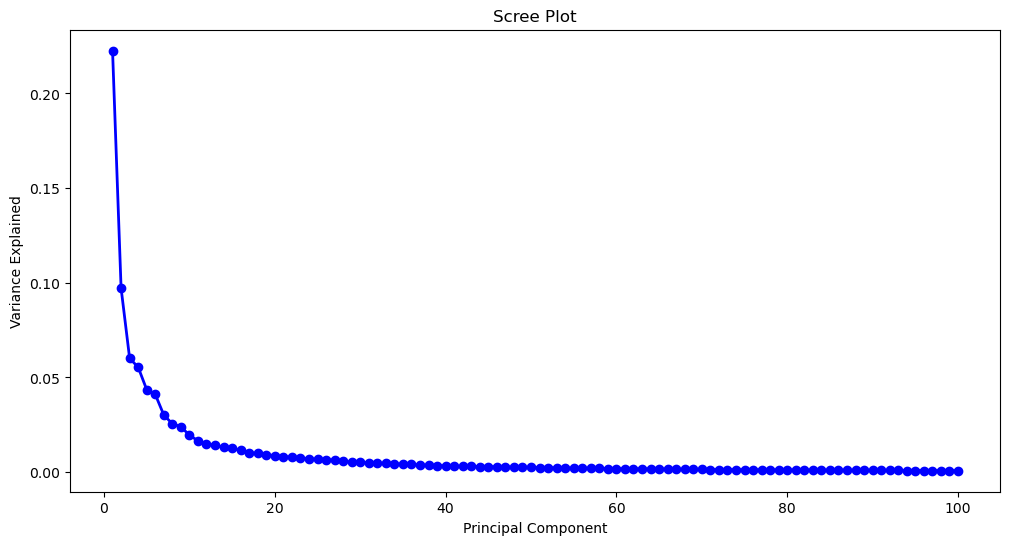

In [16]:
# Plotting the scree plot
plt.figure(figsize=(12,6))
PC_values=np.arange(pca.n_components_)+1
plt.plot(PC_values, pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [18]:
# keeping the top 50 PCs only in dataset
pca=PCA(n_components=50)
df_pca=pca.fit_transform(X=X)

# Store dataframe and print
df_pca=pd.DataFrame(df_pca)
df_pca.round(2).shape

(3147, 50)

In [19]:
variances=pca.explained_variance_ratio_.round(4).reshape(1,-1)
percentage=(variances*100).reshape(1,-1)
var=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)
r=np.arange(1,51)
final=[r,variances[0], percentage[0], var[0]]
final
df=pd.DataFrame(data=final)
df1=df.T
columns=['PC#','Variance','Percentage','Cummulative var']
df1.columns=columns
df1

,PC#,Variance,Percentage,Cummulative var
0,1.0,0.2226,22.26,22.26
1,2.0,0.0971,9.71,31.97
2,3.0,0.0601,6.01,37.98
3,4.0,0.0554,5.54,43.52
4,5.0,0.0435,4.35,47.87
5,6.0,0.0410,4.10,51.97
6,7.0,0.0301,3.01,54.98
7,8.0,0.0255,2.55,57.53
8,9.0,0.0240,2.40,59.93
9,10.0,0.0195,1.95,61.88


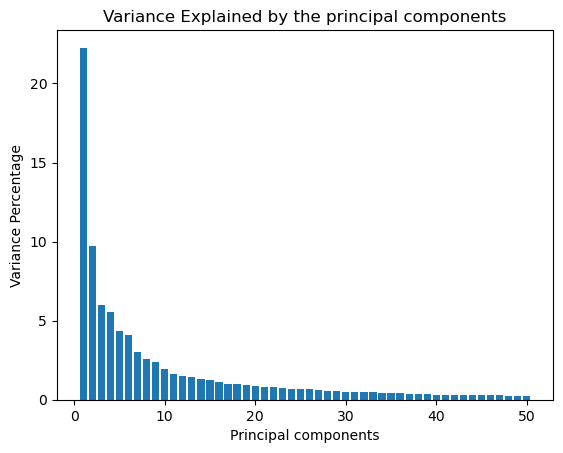

In [20]:
plt.bar(r,height=pca.explained_variance_ratio_.round(4)*100)
plt.xlabel("Principal components")
plt.ylabel("Variance Percentage")
plt.title("Variance Explained by the principal components")
plt.show()

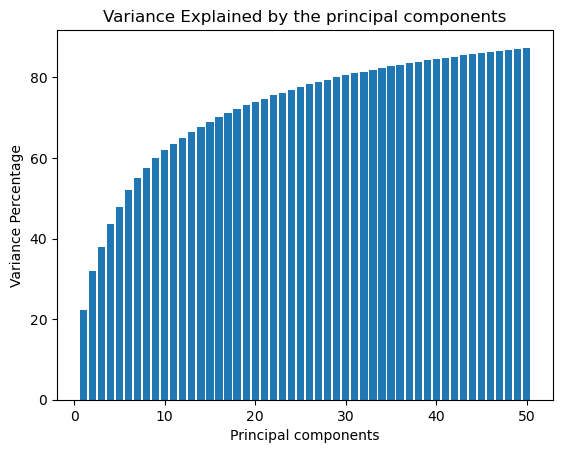

In [22]:
plt.bar(r,height=np.cumsum(np.round(variances, decimals=4)*100))
plt.xlabel("Principal components")
plt.ylabel("Variance Percentage")
plt.title("Variance Explained by the principal components")
plt.show()

In [23]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-134.272411,107.740102,-544.923409,313.075995,-500.134982,163.354256,-223.046212,-460.862252,1016.398107,206.766557,...,119.202498,-23.581829,15.247364,-175.952004,155.229616,16.497949,10.523635,128.515689,-21.495039,114.560393
1,-970.415120,-371.815822,114.480754,-339.005162,-53.982530,-106.119979,19.826584,-443.883799,-220.422325,69.631540,...,-34.849394,-66.235502,-75.430942,-19.715925,6.899898,-52.165646,-11.095142,-10.238793,-46.788994,9.822870
2,1267.529703,-263.230207,-35.686933,612.758736,-734.466507,267.736221,363.049391,-130.846209,-160.311149,-353.753836,...,61.540914,-85.969822,81.834973,8.808578,-14.170566,20.845215,-69.716969,-25.163415,-162.670657,79.043810
3,-1066.123553,-239.331642,137.988621,-424.366232,-174.547096,209.850340,57.164608,-316.860851,-325.027736,148.858644,...,-35.655822,-63.281409,5.922013,41.506949,40.833890,46.093898,10.762007,-94.325911,-49.282496,-34.055444
4,1037.176916,-427.394186,-700.740250,-566.284242,134.667725,-584.412757,-546.833432,-70.674785,52.580771,306.396610,...,-107.512823,131.092043,156.706500,-14.917571,-22.432294,-162.674377,-25.302677,53.427673,-2.246714,12.522931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,-1018.214154,-466.254488,28.869654,230.822879,-86.809624,381.402311,-161.224385,-116.844293,-362.088174,197.669103,...,6.070609,78.031273,-22.942456,30.449448,32.083752,63.410992,55.695049,23.517731,-80.455615,39.315997
3143,-31.910688,532.992544,-725.466820,99.339390,-203.097494,275.152763,-263.029654,381.752778,-995.475768,-504.893289,...,134.769092,-78.820965,26.400088,-177.791305,-145.648112,76.061380,-18.472383,-36.558767,83.482602,32.299776
3144,1467.868047,-268.859552,635.240891,-466.368314,-162.052081,1172.372584,-91.875599,437.256561,644.772416,164.700666,...,23.723741,89.159398,40.685959,-87.023845,-128.726352,-56.520357,80.888180,-14.403660,-93.457740,42.340471
3145,-1070.029279,-119.693078,180.788257,-271.003026,-213.400906,409.351278,-138.321388,-249.781278,-284.347897,214.286982,...,124.640034,30.987245,-80.732852,-49.059740,38.752236,-59.879380,62.408809,72.879433,45.924970,48.094347


In [24]:
df_pca['y']=Y
df_pca

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,y
0,-134.272411,107.740102,-544.923409,313.075995,-500.134982,163.354256,-223.046212,-460.862252,1016.398107,206.766557,...,-23.581829,15.247364,-175.952004,155.229616,16.497949,10.523635,128.515689,-21.495039,114.560393,2
1,-970.415120,-371.815822,114.480754,-339.005162,-53.982530,-106.119979,19.826584,-443.883799,-220.422325,69.631540,...,-66.235502,-75.430942,-19.715925,6.899898,-52.165646,-11.095142,-10.238793,-46.788994,9.822870,1
2,1267.529703,-263.230207,-35.686933,612.758736,-734.466507,267.736221,363.049391,-130.846209,-160.311149,-353.753836,...,-85.969822,81.834973,8.808578,-14.170566,20.845215,-69.716969,-25.163415,-162.670657,79.043810,0
3,-1066.123553,-239.331642,137.988621,-424.366232,-174.547096,209.850340,57.164608,-316.860851,-325.027736,148.858644,...,-63.281409,5.922013,41.506949,40.833890,46.093898,10.762007,-94.325911,-49.282496,-34.055444,1
4,1037.176916,-427.394186,-700.740250,-566.284242,134.667725,-584.412757,-546.833432,-70.674785,52.580771,306.396610,...,131.092043,156.706500,-14.917571,-22.432294,-162.674377,-25.302677,53.427673,-2.246714,12.522931,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,-1018.214154,-466.254488,28.869654,230.822879,-86.809624,381.402311,-161.224385,-116.844293,-362.088174,197.669103,...,78.031273,-22.942456,30.449448,32.083752,63.410992,55.695049,23.517731,-80.455615,39.315997,1
3143,-31.910688,532.992544,-725.466820,99.339390,-203.097494,275.152763,-263.029654,381.752778,-995.475768,-504.893289,...,-78.820965,26.400088,-177.791305,-145.648112,76.061380,-18.472383,-36.558767,83.482602,32.299776,2
3144,1467.868047,-268.859552,635.240891,-466.368314,-162.052081,1172.372584,-91.875599,437.256561,644.772416,164.700666,...,89.159398,40.685959,-87.023845,-128.726352,-56.520357,80.888180,-14.403660,-93.457740,42.340471,0
3145,-1070.029279,-119.693078,180.788257,-271.003026,-213.400906,409.351278,-138.321388,-249.781278,-284.347897,214.286982,...,30.987245,-80.732852,-49.059740,38.752236,-59.879380,62.408809,72.879433,45.924970,48.094347,1


In [25]:
df_pca.shape

(3147, 51)